### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [3]:
# importing library
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# geting data from  'movielens_data.csv' file
movie_Lens = pd.read_csv('files/movielens_data.csv')
movie_Lens.head(100)

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,186,39.0,F,executive,302,NaN,Crime,891717742
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
4,166,47.0,NaN,educator,346,1.0,Drama,886397596
...,...,...,...,...,...,...,...,...
95,119,32.0,M,programmer,1153,5.0,Musical,874781198
96,62,27.0,F,administrator,498,NaN,Action,879373848
97,62,27.0,NaN,administrator,382,3.0,Comedy,879375537
98,28,32.0,M,writer,209,4.0,Musical,881961214


#### Removal of missing data


In [22]:
# Question 1 solution
# printing the length of the data prior removing the missing data
length_previous_missing_data = len(movie_Lens)
print("The Length of the data before removing the missing data :" + str(length_previous_missing_data))

# Removal of missing data
new_movie_Lens =  movie_Lens.dropna() 

# Removing data with occupation is 'none'
final_movie_Lens = new_movie_Lens.drop(new_movie_Lens[new_movie_Lens.occupation == 'none'].index)
final_Movies_Length = len(final_movie_Lens)

print('The Length of the data after removing missing data as of question conditions  : ' + str(final_Movies_Length))



The Length of the data before removing the missing data :100000
The Length of the data after removing missing data as of question conditions  : 99022


In [28]:
final_movie_Lens.to_csv(r'C:\Users\shrea\Documents\GitHub\Portfolio\data-science-portfolio-Ghtanisuresh\files\movielens_data_clean.csv', index = False, header = True)


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


## Solution for the question 'Q2.1'.


In [4]:
# unique users
totalNumUniqueUsers = final_movie_Lens.userId.nunique()
print('Total number of unique Users : ', totalNumUniqueUsers)

# unique occupations
totalNumUniqueOccupations = final_movie_Lens.occupation.nunique()
print('Total number of unique Occupations : ', totalNumUniqueOccupations)

# unique movies
totalNumUniqueMovies = final_movie_Lens.movieId.nunique()
print('Total number of unique Movies : ', totalNumUniqueMovies)

# unique genres
totalNumUniqueGenre = final_movie_Lens.genre.nunique()
print('Total number of unique Genre : ', totalNumUniqueGenre)



Total number of unique Users :  934
Total number of unique Occupations :  20
Total number of unique Movies :  1682
Total number of unique Genre :  19


## Solution for the question 'Q2.2'

In [5]:
# the total number, mean, std, min and max regarding all rating records
print('Total number regarding all rating records : ', final_movie_Lens.rating.count())

print('Mean regarding all rating records : ', final_movie_Lens.rating.mean())

print('Std regarding all rating records : ', final_movie_Lens.rating.std())

print('Min regarding all rating records : ', final_movie_Lens.rating.min())

print('Max regarding all rating records : ', final_movie_Lens.rating.max())


Total number regarding all rating records :  99022
Mean regarding all rating records :  3.5277918038415708
Std regarding all rating records :  1.1257428690692985
Min regarding all rating records :  1.0
Max regarding all rating records :  5.0


## Solution for the question 'Q2.3'

In [6]:
#  mean, std, max, and min of the number of movies rated by each user

movies_rated_by_each_user = final_movie_Lens.groupby('userId').agg({'movieId': ['mean','std', 'max', 'min']})
  
print("Mean,std, max, and min values of the number of movies rated by each user:")
print(movies_rated_by_each_user)


Mean,std, max, and min values of the number of movies rated by each user:
           movieId                       
              mean         std   max  min
userId                                   
1       136.500000   78.663842   272    1
2       249.500000   93.021194   316    1
3       318.814815   33.955061   355  181
4       291.041667   90.440218   362   11
5       292.582353  138.830264   457    1
...            ...         ...   ...  ...
939     514.081633  337.429365  1277    9
940     346.850467  268.088791  1401    4
941     357.818182  304.156701  1007    1
942     429.113924  275.959352  1221   31
943     379.089286  303.931875  1330    2

[934 rows x 4 columns]


## Solution for the question 'Q2.4'

In [7]:
# mean, std, max, min of the number of ratings that received by each movie

ratings_received_by_each_movie = final_movie_Lens.groupby('movieId').agg({'rating': ['mean','std', 'max', 'min']})
  
print("Mean,std, max, and min values of the rating received by each movie")
print(ratings_received_by_each_movie)

Mean,std, max, and min values of the rating received by each movie
           rating                    
             mean       std  max  min
movieId                              
1        3.876404  0.927802  5.0  1.0
2        3.186047  0.958249  5.0  1.0
3        3.034091  1.188536  5.0  1.0
4        3.543689  0.955362  5.0  1.0
5        3.273810  0.935913  5.0  1.0
...           ...       ...  ...  ...
1678     1.000000       NaN  1.0  1.0
1679     3.000000       NaN  3.0  3.0
1680     2.000000       NaN  2.0  2.0
1681     3.000000       NaN  3.0  3.0
1682     3.000000       NaN  3.0  3.0

[1682 rows x 4 columns]


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<AxesSubplot:xlabel='gender', ylabel='rating'>

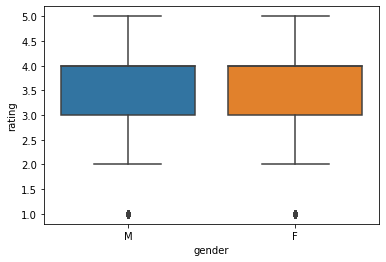

In [13]:
# Code to display the box plot for male and female users and to compare the rating provide by the male and female user
plt.figure()
sns.boxplot(x='gender', y='rating', data=final_movie_Lens, orient="v")

# After seeing the box plot we can conclude that male and female user tends to provide same ratings

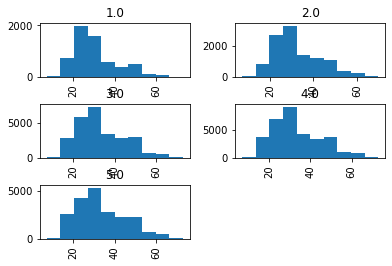

In [14]:
# different histogram of rating with respect to age.
final_movie_Lens.hist(column = 'age', by = 'rating');

<AxesSubplot:xlabel='occupation', ylabel='rating'>

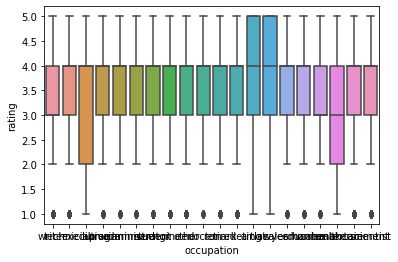

In [16]:
#box plot for rating with respect to occupation
plt.figure()
sns.boxplot(x='occupation', y='rating', data=final_movie_Lens, orient="v")

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [21]:
#removing users whose age is no more than 10
age_removing_outliers = final_movie_Lens[(final_movie_Lens.age > 10)]

#removing users who rate less than 20 movies
rater_removing1 = age_removing_outliers[ age_removing_outliers.groupby('userId').movieId.transform(len) > 20]

#removing movies that receives less than 10 ratings
less_ratings = rater_removing1[rater_removing1.groupby('movieId').rating.transform(len) > 10]

#printing the length of the data after removing outliers
print('The length of data after remains after removing outliers : ', len(less_ratings))

The length of data after remains after removing outliers :  95943
